## Name: Dat Ho

# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

## Loading the dataset

In [2]:
data = pd.read_csv("used_device_data.csv")
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [3]:
data.shape

(3454, 15)

<IPython.core.display.Javascript object>

The dataset contains 3454 rows and 15 columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

Data types: 4 object, 9 float64, 2 int64.

There number of non-null count is inconsistent means that there are some data missing.

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


<IPython.core.display.Javascript object>

##### Observations: 

* Average screen size is 13.7 cm, the largest screen size is 30.7 cm.
* Average back camera is 9 megapixel, the maximum is 48 megapixel.
* Average front camera is 6.5 megapixel, the maximum is 32 megapixel.
* Average internal memory is 54GB, maximum is 1024GB.
* Average RAM is 4GB, maximum is 12GB.
* Average battery size is 3133 mAh, maximum is 9729 mAh.
* Average weight is 182.75 grams, maximum weight is 855 grams.
* Average days used is 675 days, maximum days used is 1094 days.
* Average normalized used price is 4.36 euros, max used pice is 6.61 euros.
* Average normalized new price is 5.23 euros, max new price is 7.84 euros.


##### Check for duplication

In [6]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

#### Observations:
No sign of duplicated data.

##### Check for missing data

In [7]:
data.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

#### Observation:
There are some missing data in the dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [8]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

### Univariate Analysis

In [9]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [11]:
# convert release_year into object datatype
df.release_year = df.release_year.astype("object")

# create two lists
numeric_columns = []
categorical_columns = []

# Separate columns in to two categories
for col in df.columns:
    if df[col].dtype != "int64" and df[col].dtype != "float64":
        categorical_columns.append(col)
    else:
        numeric_columns.append(col)


print("Numeric data type columns: ", numeric_columns)
print("Non-numeric data type columns: ", categorical_columns)

Numeric data type columns:  ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'days_used', 'normalized_used_price', 'normalized_new_price']
Non-numeric data type columns:  ['brand_name', 'os', '4g', '5g', 'release_year']


<IPython.core.display.Javascript object>

Separate columns into two categories:
* Numerical: 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price'
* Non-numerical: 'brand_name', 'os', '4g', '5g'

##### Display all of the numerical columns using histogram in order:
* screen_size
* main_camera_mp
* selfie_camera_mp
* int_memory
* ram 
* battery
* weight 
* days_used
* normalized_used_price

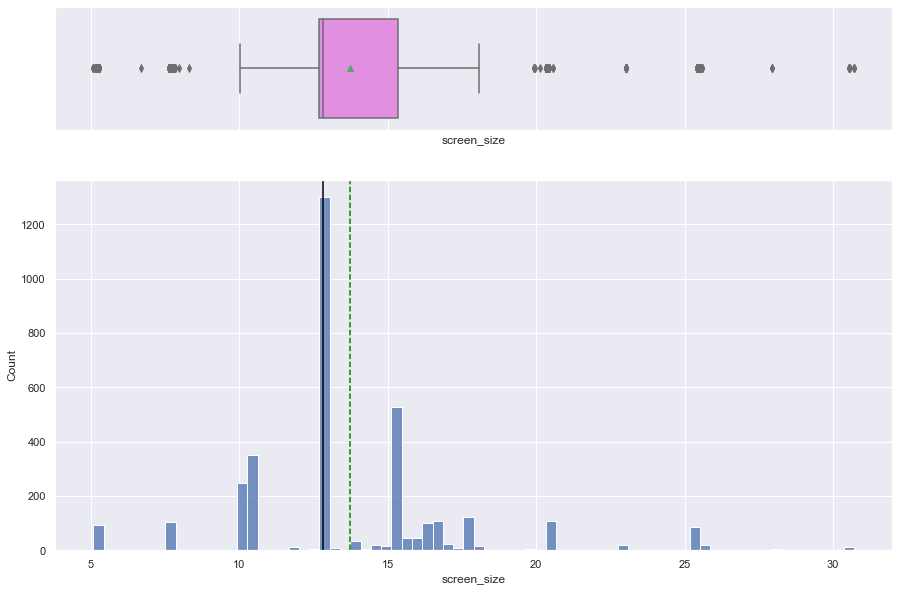

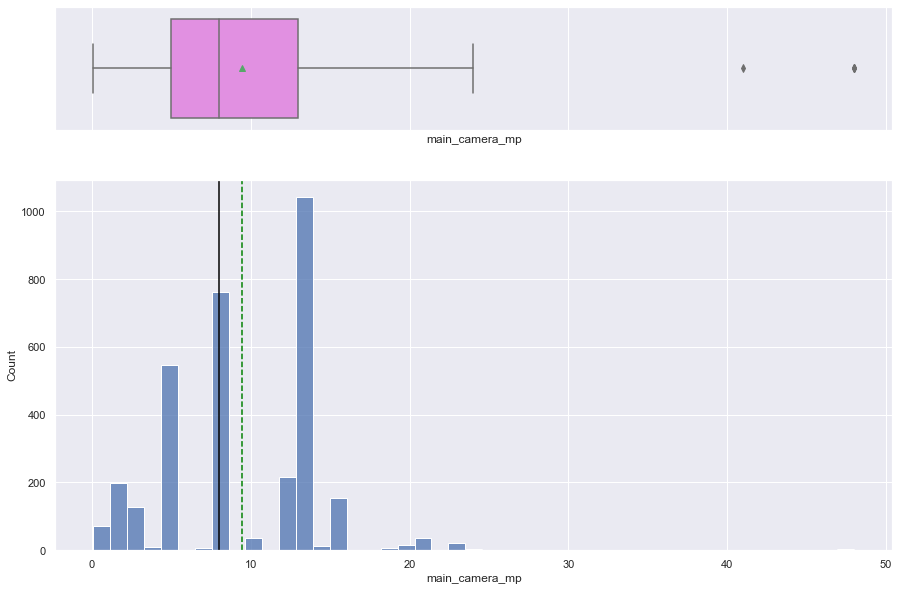

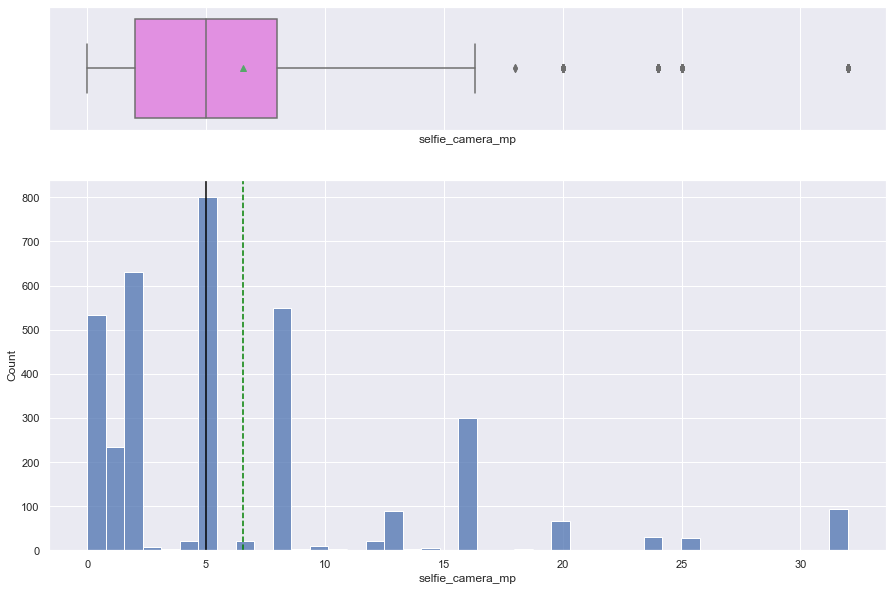

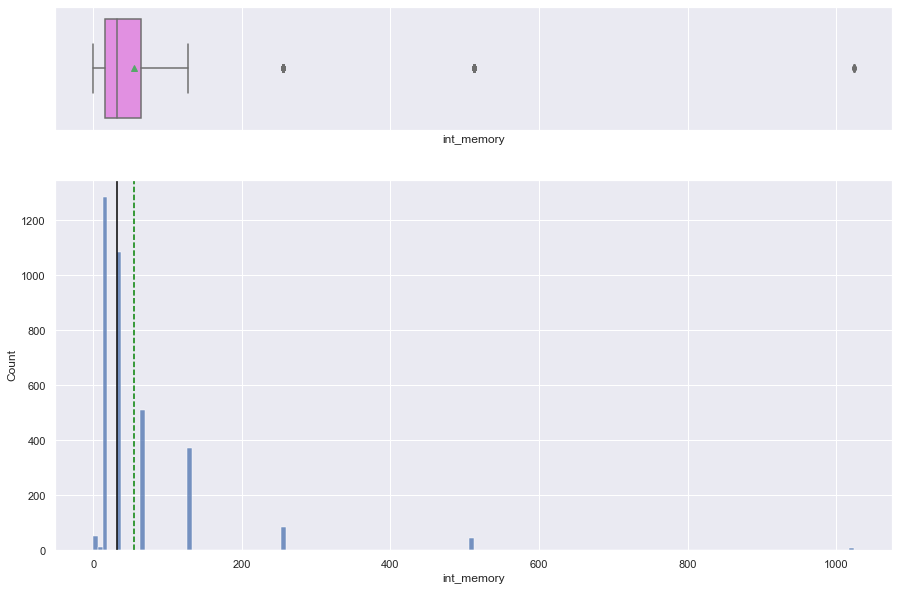

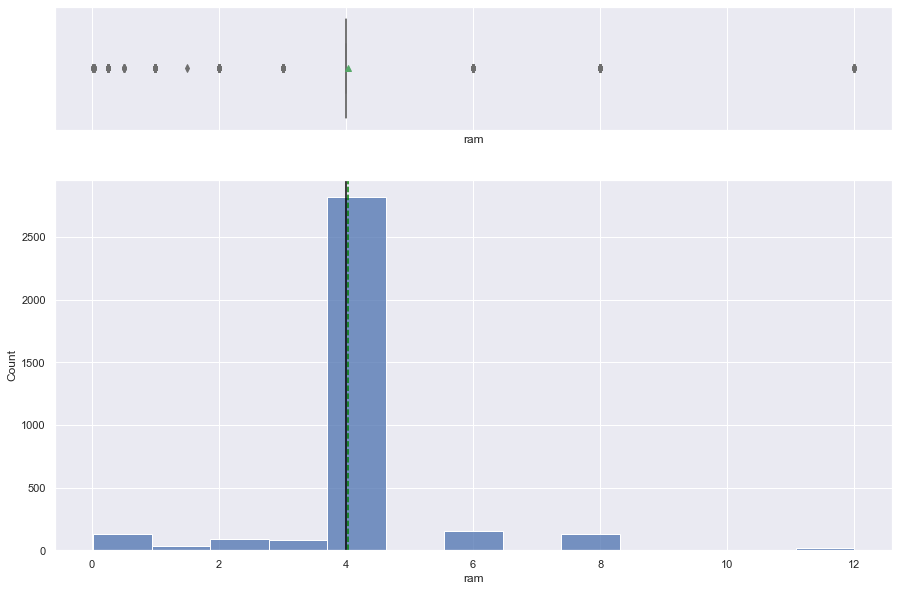

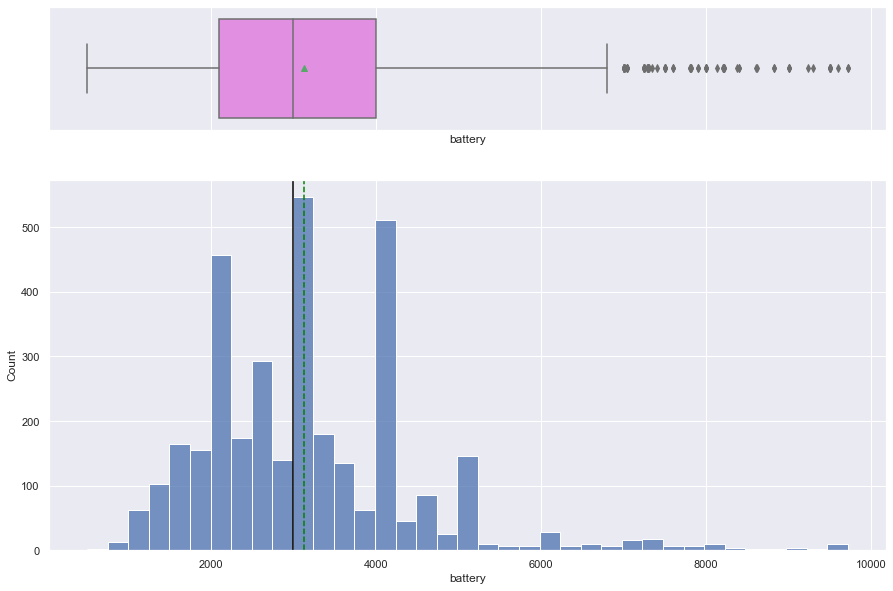

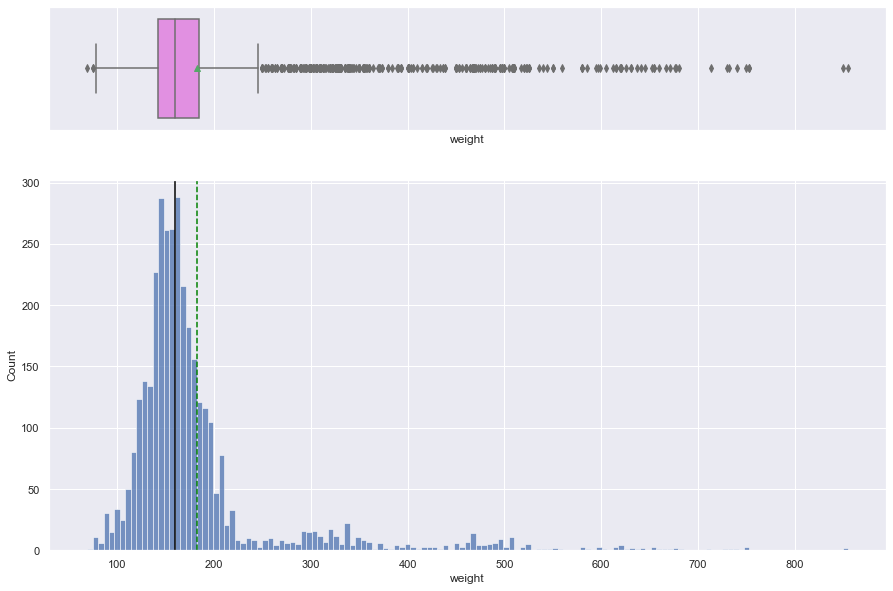

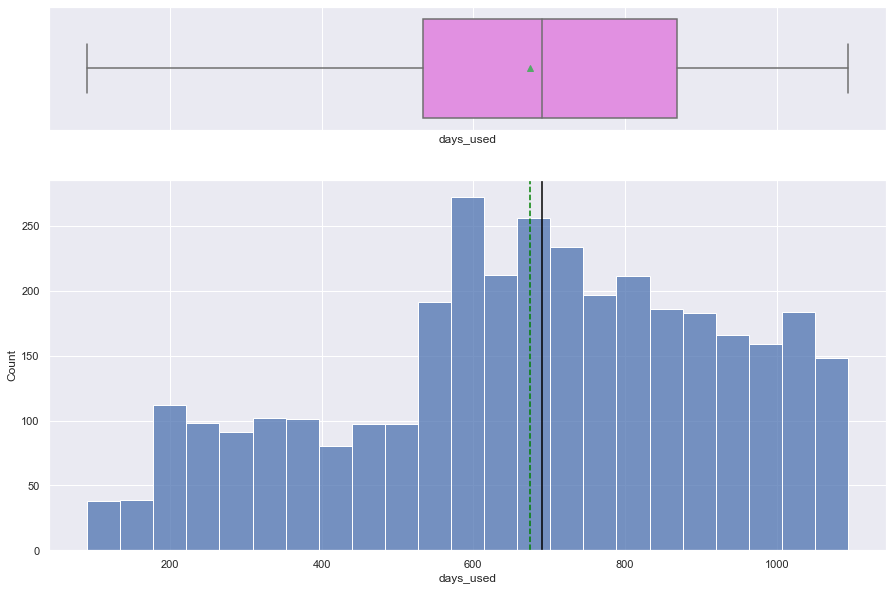

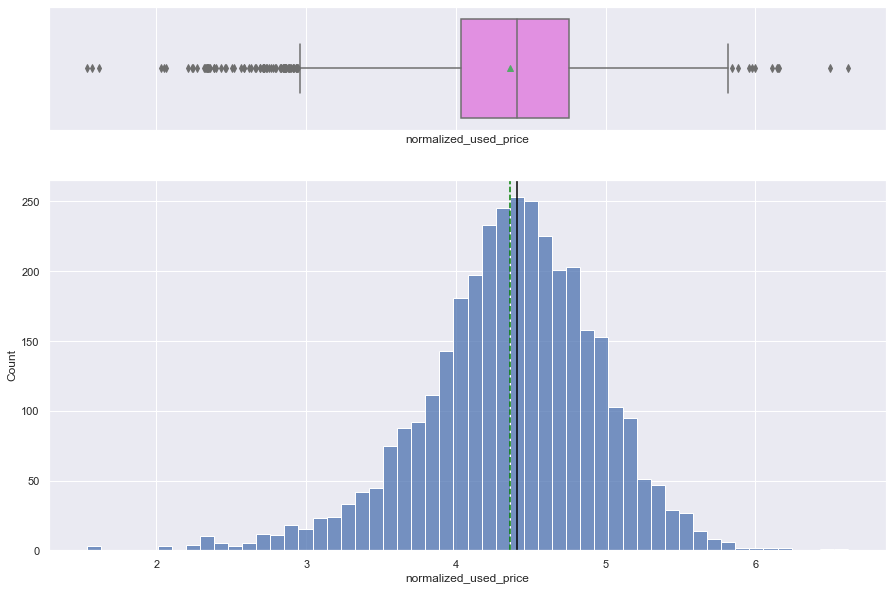

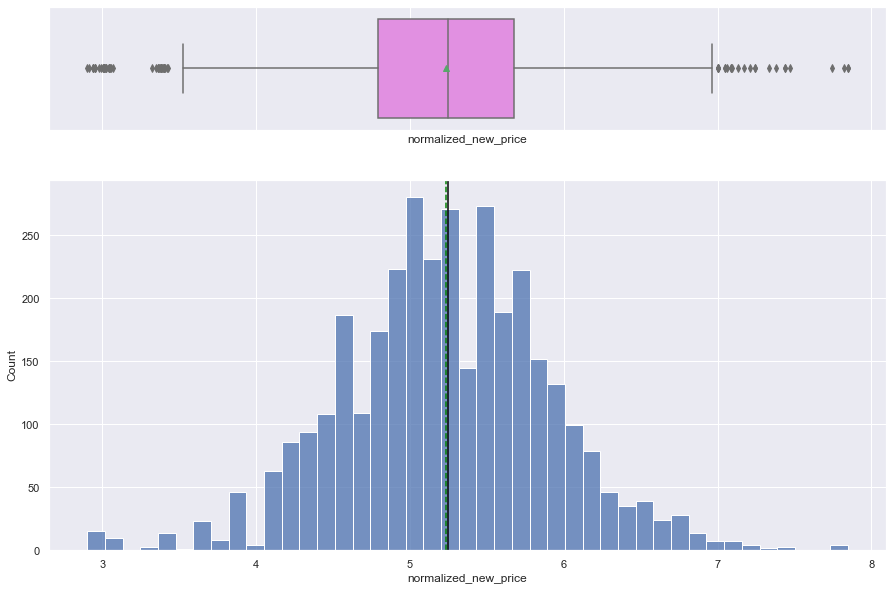

<IPython.core.display.Javascript object>

In [12]:
def histogram_boxplot_for_columns(data, col):
    for col in numeric_columns:
        histogram_boxplot(df, col)


# Call the function to create visualizations
histogram_boxplot_for_columns(df, numeric_columns)

# Show the plots
plt.show()

#### Observations:
1. What does the distribution of normalized used device prices look like?

The distribution of normalized used device look like a normal distribution. Based on statistical summary, the used price range from 3 to 6 euros. Based on the boxplot, it seems to have a lot of outliers.

2. What percentage of the used device market is dominated by Android devices? 

According to the barplot, 93.1% of the used device market is dominated by Android devices.

##### Display all non-numerical columns in bar plot in order:
* brand_name
* os 
* 4g 
* 5g
* release_year

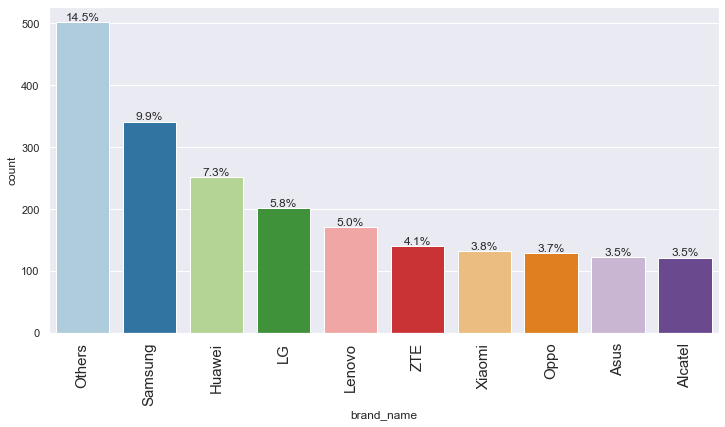

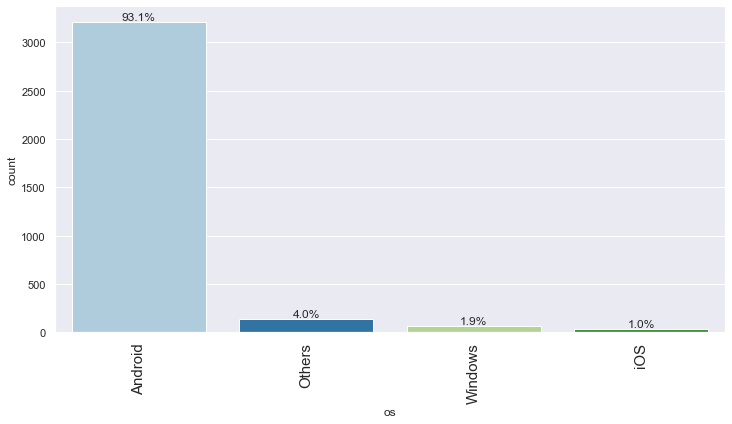

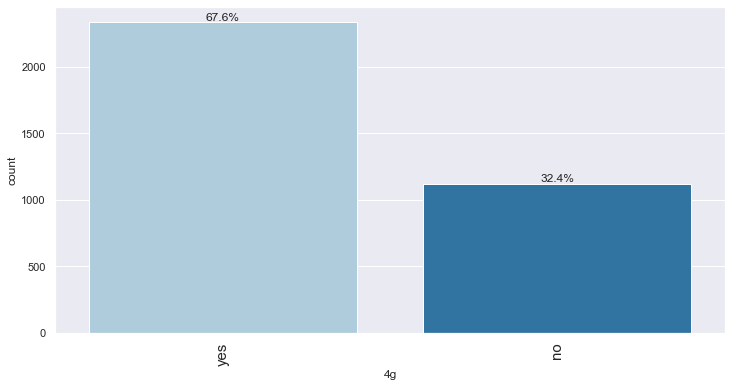

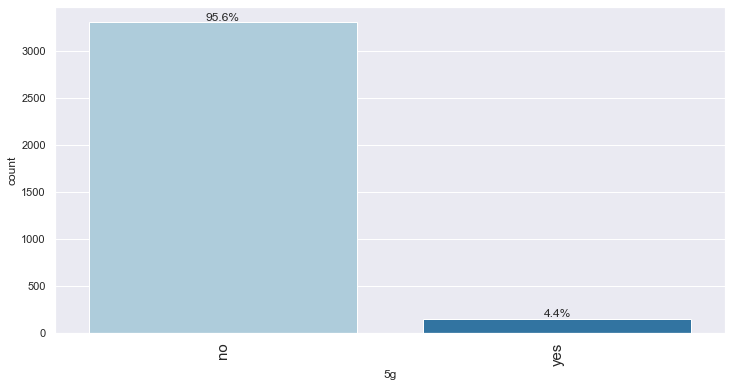

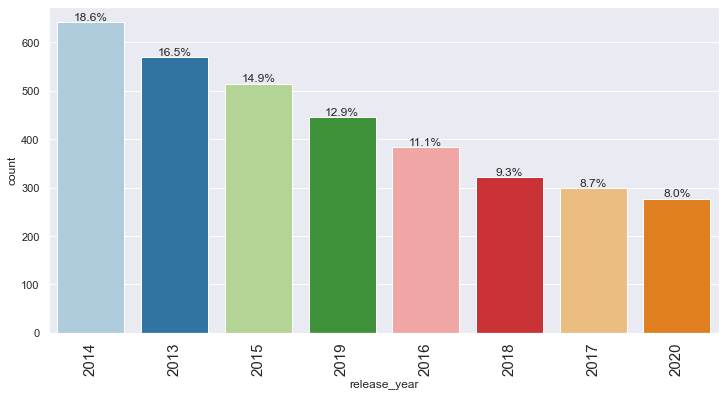

<IPython.core.display.Javascript object>

In [13]:
def label_barplot_for_columns(data, col):
    for col in categorical_columns:
        labeled_barplot(df, col, perc=True, n=10)


label_barplot_for_columns(df, categorical_columns)
plt.show()

### Bivariate Analysis

#### Correlation:

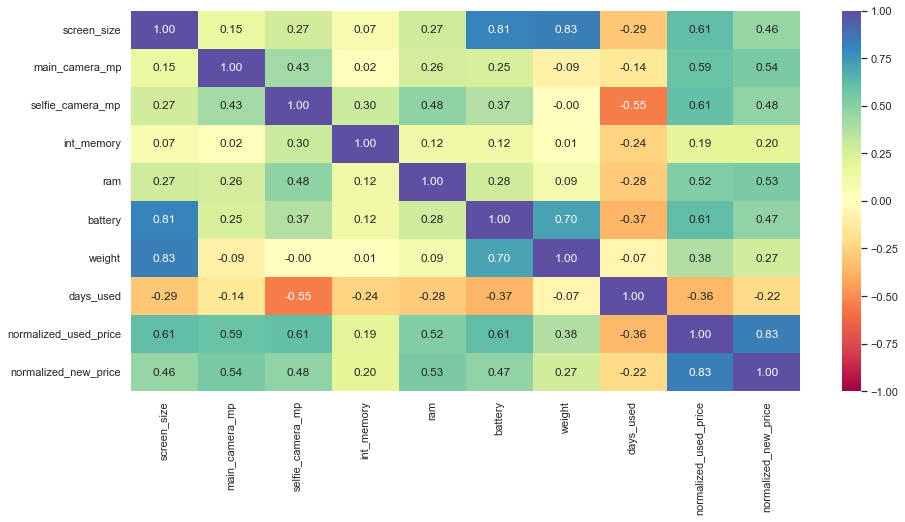

<IPython.core.display.Javascript object>

In [14]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
* screen_size is highly correlated with battery and weight.
* normalized_used_price is highly correlated with normalized_new_price.

##### 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

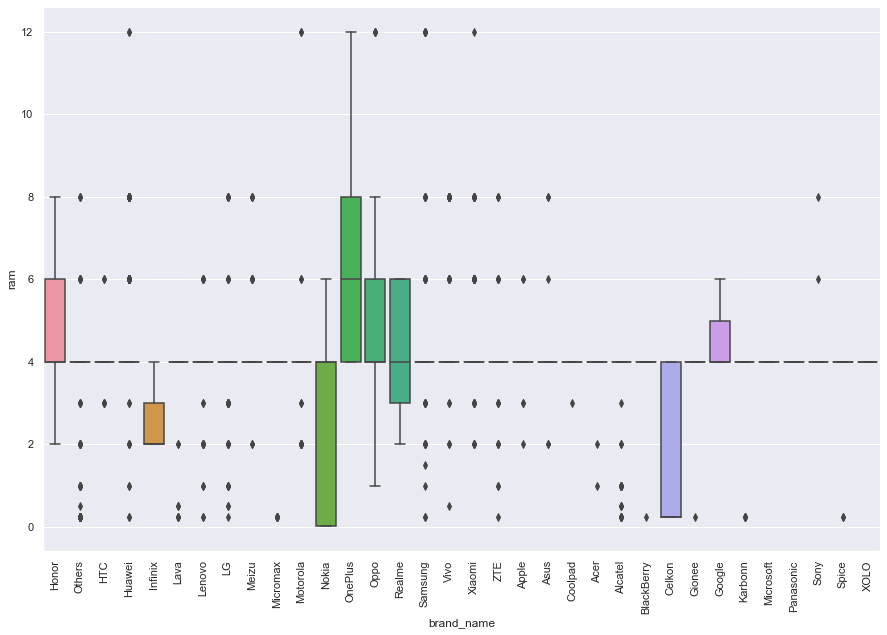

<IPython.core.display.Javascript object>

In [15]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

#### Observations:
The majority of brands provide at least 4GB of RAM on their devices. However, some of the brands have higher RAM options for their devices, maximum RAM is 12 GB.

#### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [16]:
# filter the number of phones that have more than 4500 mAh
df_more_4500mAh = df[df.battery > 4500]
print(
    "The number of phones that have more than 4500 mAh is: ", df_more_4500mAh.shape[0]
)

The number of phones that have more than 4500 mAh is:  341


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='brand_name', ylabel='weight'>

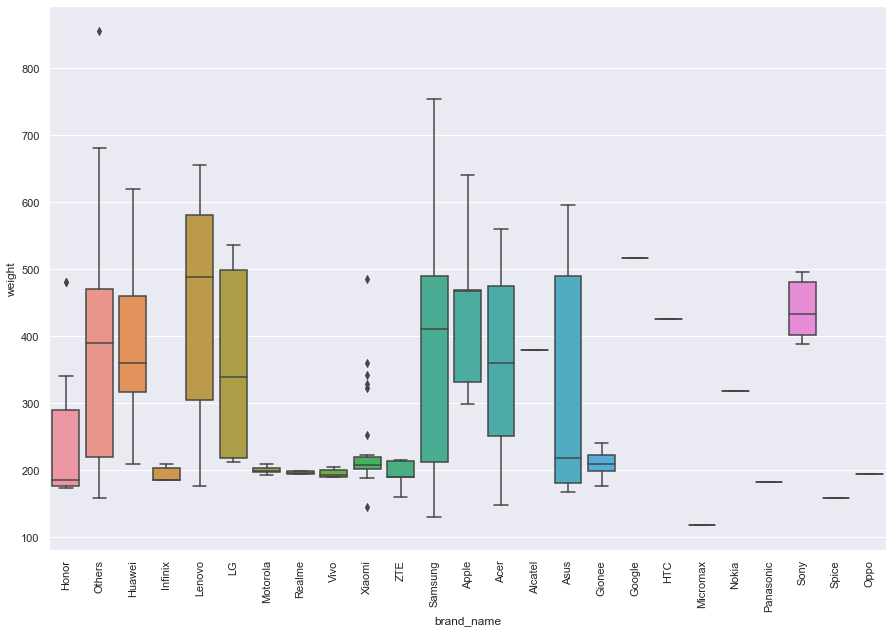

<IPython.core.display.Javascript object>

In [17]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
sns.boxplot(data=df_more_4500mAh, x="brand_name", y="weight")

In [18]:
df_more_4500mAh.weight.describe()

count    341.000000
mean     332.275660
std      155.501832
min      118.000000
25%      198.000000
50%      300.000000
75%      467.000000
max      855.000000
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
The minimum weight is 118 grams, the maximum weight is 855 grams. Average weight is 332 grams.

#### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
Note: 1 inch = 2.54 cm

In [19]:
# filter number of phones that have screen size greater than 6 inches
df_6inch_greater = df[df.screen_size > 6 * 2.54]
print(
    "The number of phones that have screen size greater than 6 inches is: ",
    df_6inch_greater.shape[0],
)

The number of phones that have screen size greater than 6 inches is:  1099


<IPython.core.display.Javascript object>

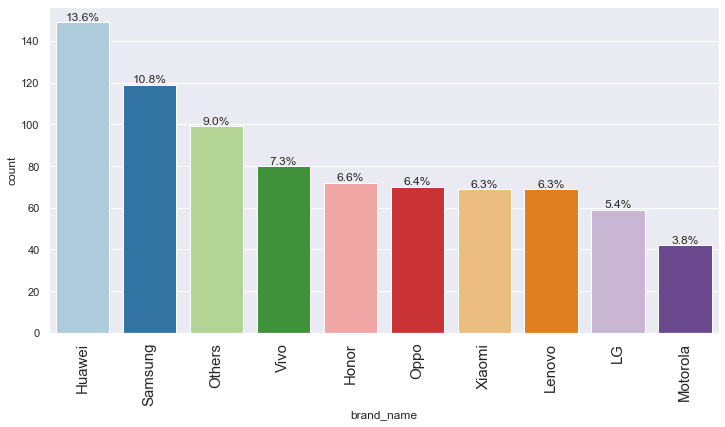

<IPython.core.display.Javascript object>

In [20]:
labeled_barplot(df_6inch_greater, "brand_name", perc=True, n=10)

#### Observations:
There are 1099 phones that have screen size greater than 6 inches. Huawei and Samsung are the two brands that have the most number of phones with screen size greater than 6 inches. 

#### 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [21]:
# filter the number of phones that offer greater than 8MP selfie camera
df_selfie_cam = df[df.selfie_camera_mp > 8]
print(
    "The number of phones that offer greater than 8 MP selfie camera is: ",
    df_selfie_cam.shape[0],
)

The number of phones that offer greater than 8 MP selfie camera is:  655


<IPython.core.display.Javascript object>

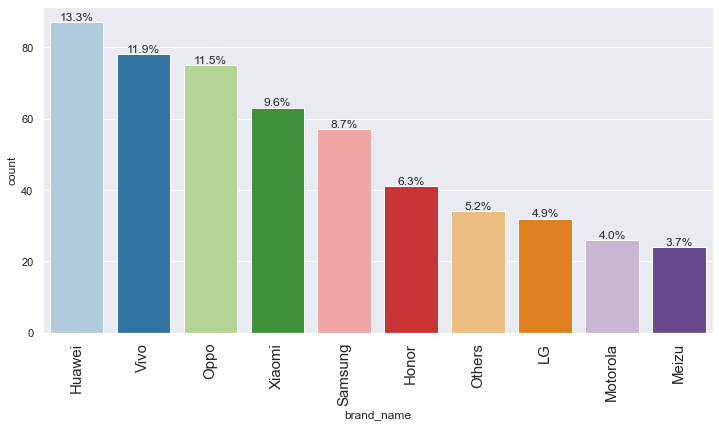

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(df_selfie_cam, "brand_name", perc=True, n=10)

#### Observations:
There are 655 phones that offer greater than 8 MP selfie camera. Huawei, Vivo, Oppo are the top three brands that offer greater than 8 MP selfie camera. 

#### Rear Camera

The number of phone that have greater than 16 MP rear camera is:  94


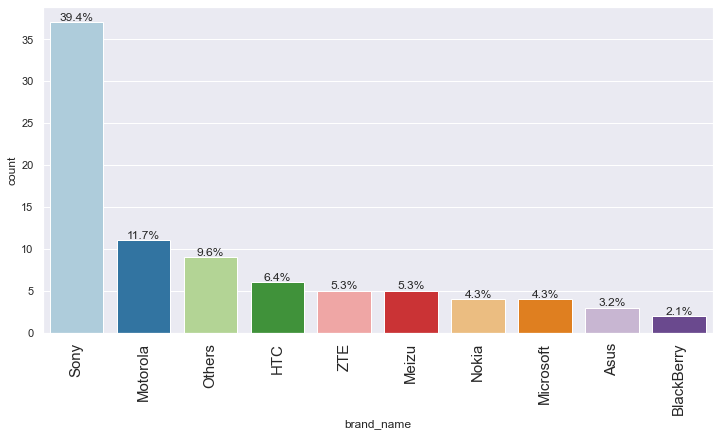

<IPython.core.display.Javascript object>

In [23]:
# filter the number of phones that have greater than 16 MP rear camera
df_rear_cam = df[df.main_camera_mp > 16]
print(
    "The number of phone that have greater than 16 MP rear camera is: ",
    df_rear_cam.shape[0],
)
labeled_barplot(df_rear_cam, "brand_name", perc=True, n=10)

#### Observations:
There are 94 phones that have greater than 16 MP rear camera. Sony is the top brand that have the most phone that have greater than 16 MP rear camera.

#### 7. Which attributes are highly correlated with the normalized price of a used device?

In [24]:
df.corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,-0.291723,0.614785,0.460889
main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,-0.144672,0.587302,0.541655
selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,-0.552636,0.608074,0.475479
int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,-0.242712,0.190993,0.195992
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,-0.280066,0.520289,0.532056
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,-0.370895,0.613619,0.470754
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,-0.067470,0.382354,0.269540
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,-0.358264,1.000000,0.834496
normalized_new_price,0.460889,0.541655,0.475479,0.195992,0.532056,0.470754,0.269540,-0.216625,0.834496,1.000000


<IPython.core.display.Javascript object>

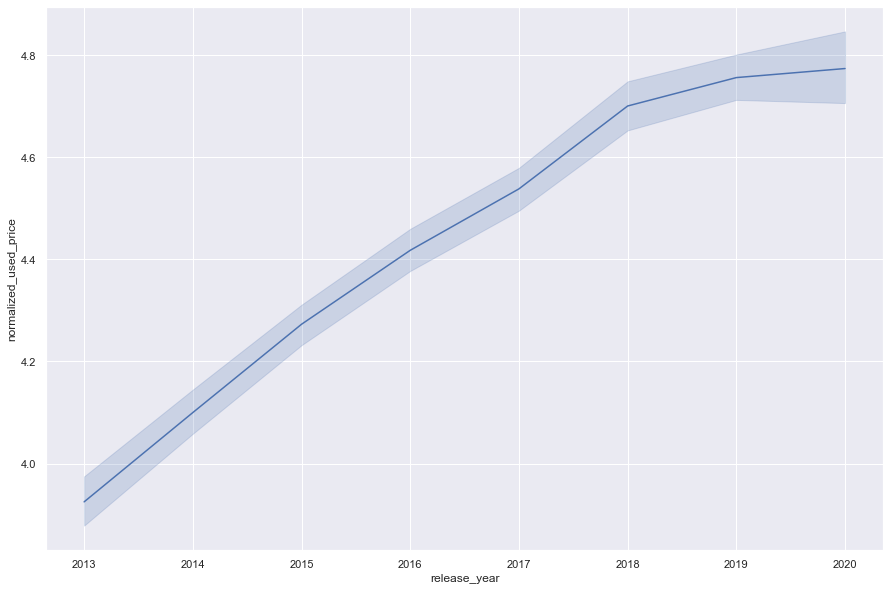

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df, x="release_year", y="normalized_used_price")

#### Observation: 
The normalized price of used device varies through release year. The latest year will have higher normalized price than previous years.

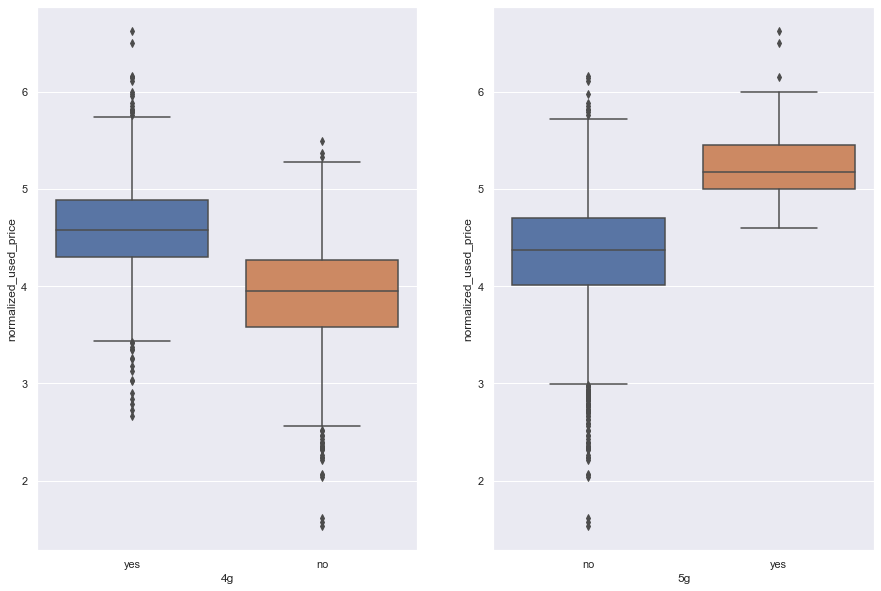

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

#### Observations:
4G and 5G phones have higher price than those that do not.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Imputation

In [27]:
df1 = df.copy()
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   object 
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

#### Observations: 
There are 6 columns that missing data following: main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight.

We will impute the missing data with the median value of grouping release_year and brand_name.


In [29]:
# create a list contain all the columns that need to impute
impute_list = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]
df1.release_year = df.release_year.astype("int64")

for col in impute_list:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["release_year", "brand_name"])[col].transform("median")
    )
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:.
There are still 4 columns missing data following: main_camera_mp, selfie_camera_mp, battery, weight.

We will continue to impute the missing data with the median group by brand_name.

In [30]:
impute_list = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in impute_list:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["brand_name"])[col].transform("median")
    )
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
There is still 1 columns missing data: main_camera_mp.

We will continue to impute the missing data with the median of main_camera_mp column.

In [31]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

#### Observation: 
All missing data has been imputed.

### Feature Engineering

In [32]:
# create new column calculated the year since release
df1["years_since_release"] = 2021 - df1["release_year"]

# drop the release_year column
df1.drop("release_year", axis=1, inplace=True)

df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

<IPython.core.display.Javascript object>

In [33]:
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


<IPython.core.display.Javascript object>

### Outlier Check

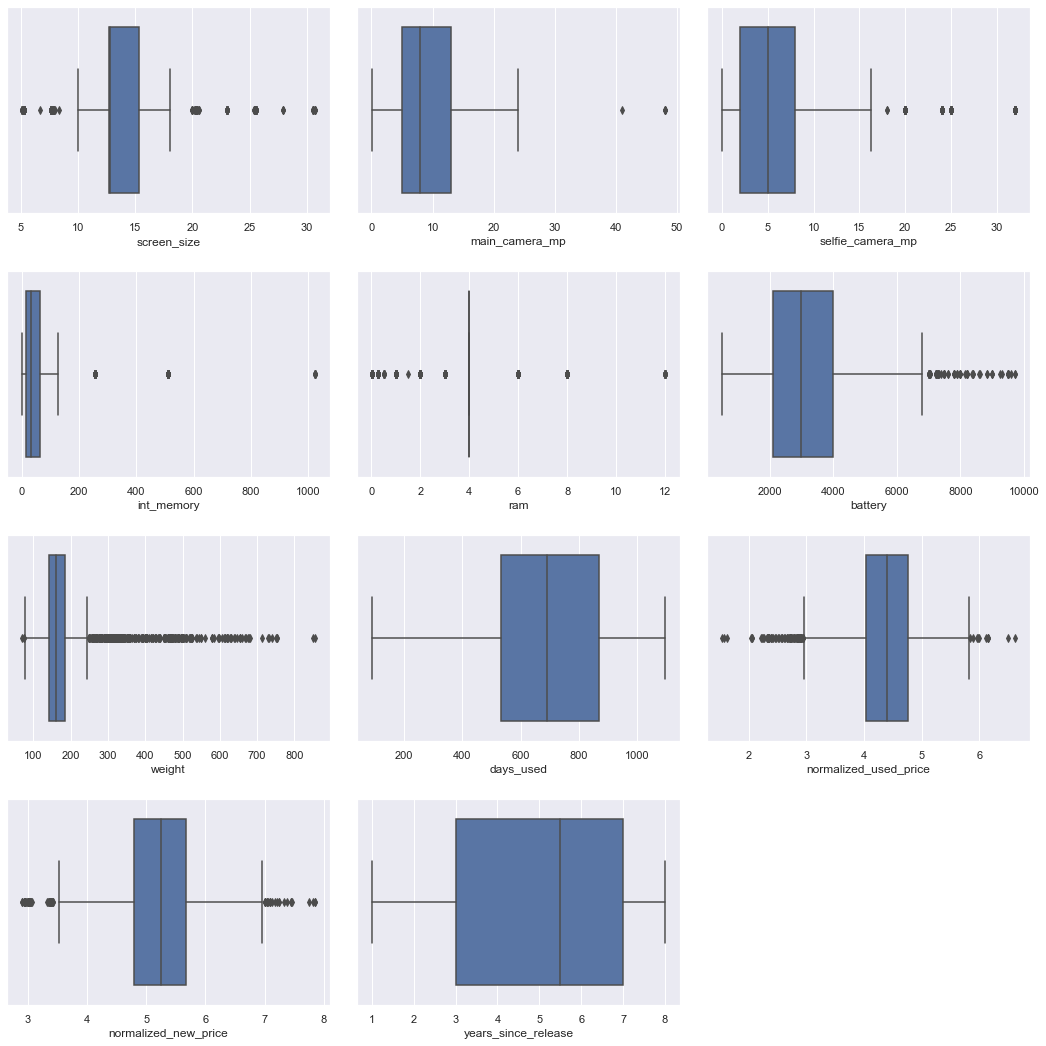

<IPython.core.display.Javascript object>

In [34]:
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

#### Observations:
There are outliers in multiple columns, but the outliers will not be removed to avoid losing data.

### Preparing data for modeling
- We want to predict the normalized price of used devices.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.
- We will build a Linear Regression model using the train data and then check it's performance.

In [35]:
# define X and y
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

<IPython.core.display.Javascript object>

In [36]:
# Add the intercept to data
X = sm.add_constant(X)

/Users/devinho/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>

In [37]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [38]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

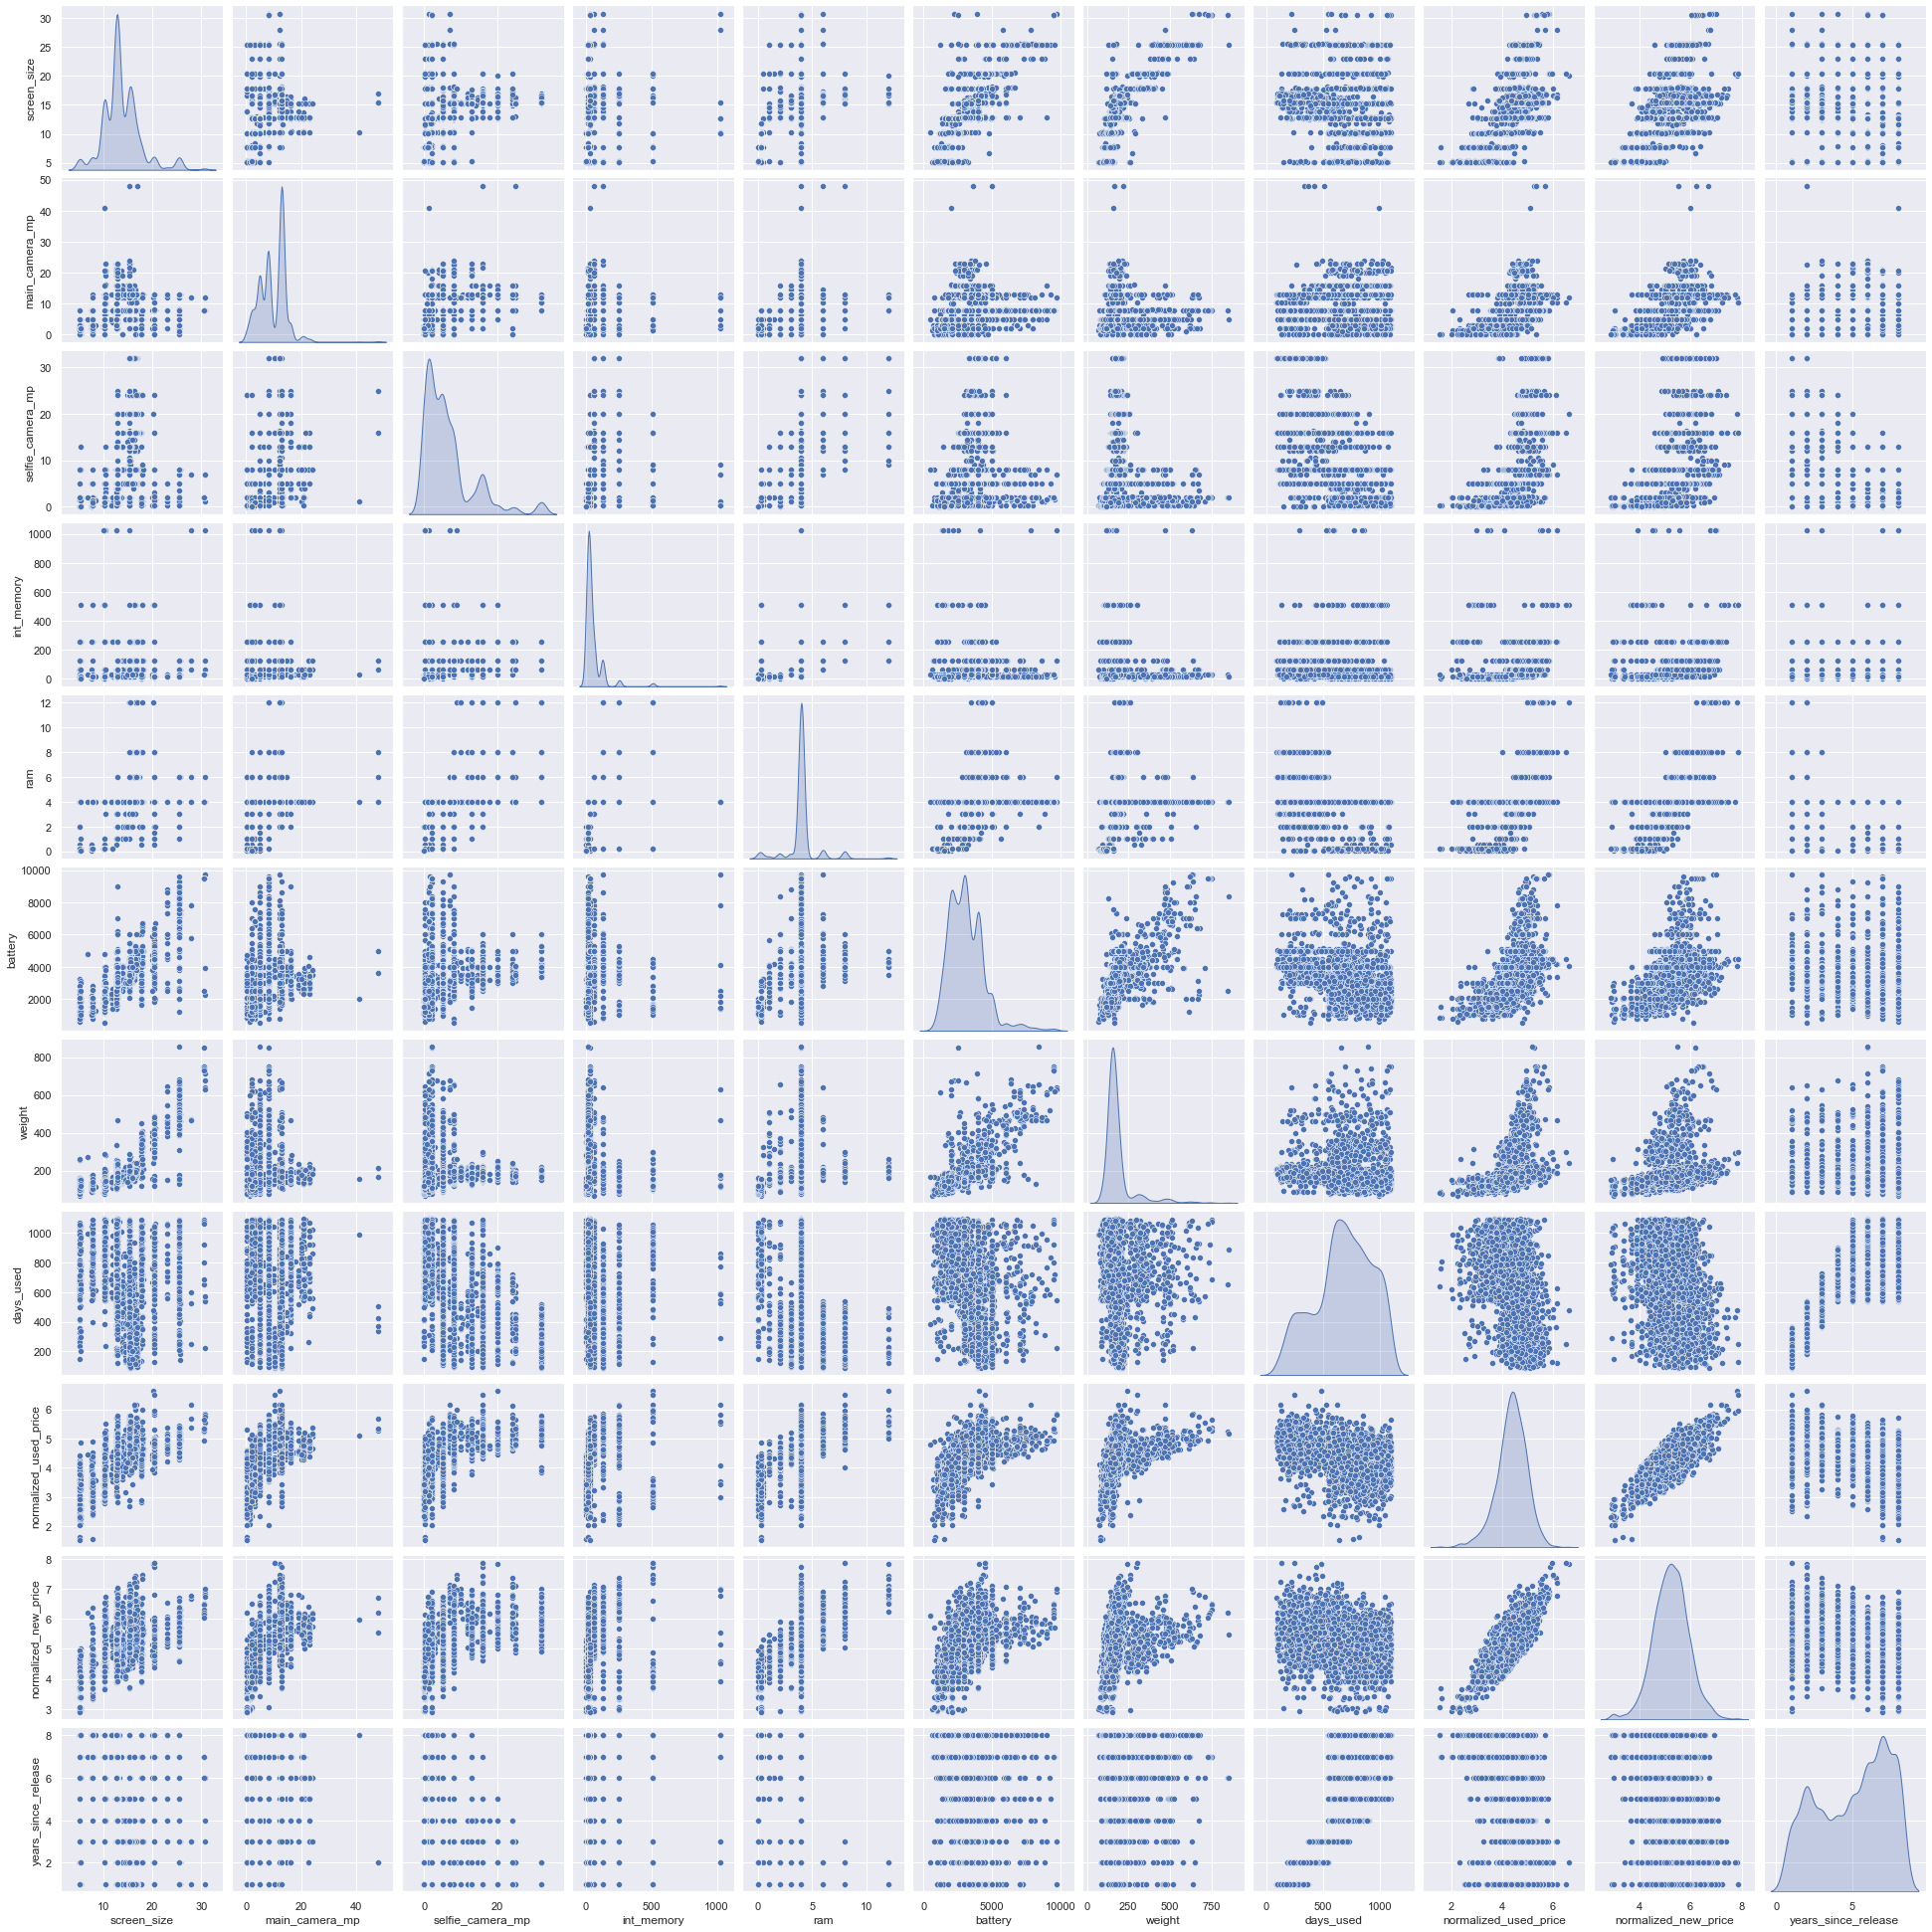

<IPython.core.display.Javascript object>

In [39]:
sns.pairplot(df1, diag_kind="kde")

## Model Building - Linear Regression

In [40]:
# Build an initial model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                           18:15:15   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

#### Observations:
Initially, the R-squared is 0.845 means this is a decent model. However, we still need to conduct model performance check to validate the train and test models.

## Model Performance Check

In [41]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [42]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


<IPython.core.display.Javascript object>

In [43]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


<IPython.core.display.Javascript object>

#### Observations:
* The training  𝑅-squared is 0.84, so the model is not underfitting.
* The train and test RMSE and MAE are comparable, so the model is not overfitting either.
* MAE suggests that the model can predict normalized used price within a mean error of 0.18 on the test data.
* MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the normalized used price.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### Test for Multicollinearity
* Check VIF

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [45]:
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


<IPython.core.display.Javascript object>

#### Observations:
* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

'screen_size' has a VIF of 7.67 and 'weight' has a VIF of 6.39 that indicating a moderate multucollinearity. There are other high VIF dummy variables, but we will not drop the dummy variable.



### Removing Multicollinearity
To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

In [46]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [47]:
# create a drop list
drop_list = ["screen_size", "weight"]

# apply pre-defined function to treat multicollinearity
drop_result = treating_multicollinearity(x_train, y_train, drop_list)
drop_result

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


<IPython.core.display.Javascript object>

#### Observations:
Based on the result, dropping screen_size or weight will decrease the adjusted R-squared even though the impact is very little. We should drop screen_size because it has less effect than weight. 

In [48]:
# select which column to drop
drop_col = "screen_size"

# specify the train data from which to drop the column specified
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(drop_col)]

# specify the test data from which to drop the column specified
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(drop_col)]

# Check VIF again
vif = checking_vif(x_train2)
print("VIF after dropping ", drop_col)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_since_release,4.730315


<IPython.core.display.Javascript object>

#### Observations:
After dropping the screen_size column, all VIF are now less than 5.

* We have dealt with multicollinearity in the data.
* Let's rebuild the model using the updated set of predictors variables.

In [49]:
olsmodel2 = sm.OLS(y_train, x_train2).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                           18:15:16   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

#### Observations:
After rebuilding the model, there are some variables with high p-value. We need to treat the high p-value by dropping them.

### Dropping high p-values variables

In [50]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


<IPython.core.display.Javascript object>

In [51]:
# specify the train data from which to select the specified columns
x_train3 = x_train2[selected_features]

# specify the test data from which to select the specified columns
x_test3 = x_test2[selected_features]

# rebuild model without multicollinearity and high p-values
olsmodel3 = sm.OLS(y_train, x_train3).fit()
print(olsmodel3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                           18:15:16   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

#### Observations:
All high p-value variables have been removed. 

**No multicollinearity is satisfied**

In [52]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel3_train_perf = model_performance_regression(olsmodel3, x_train3, y_train)
olsmodel3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


<IPython.core.display.Javascript object>

In [53]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel3_test_perf = model_performance_regression(
    olsmodel3, x_test3, y_test
)  ## Complete the code to check performance on test data
olsmodel3_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


<IPython.core.display.Javascript object>

#### Observations:
* The training  𝑅-squared is 0.839, so the model is not underfitting.
* The train and test RMSE and MAE are comparable, so the model is not overfitting either.
* MAE suggests that the model can predict normalized used price within a mean error of 0.18 on the test data.
* MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the normalized used price.

### Test for linearity and independence

In [54]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel3.resid  # residuals

df_pred.head()


,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


<IPython.core.display.Javascript object>

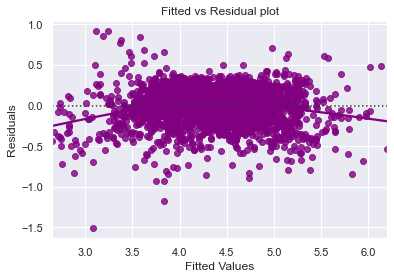

<IPython.core.display.Javascript object>

In [55]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observations:
* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).
* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### Test for normality

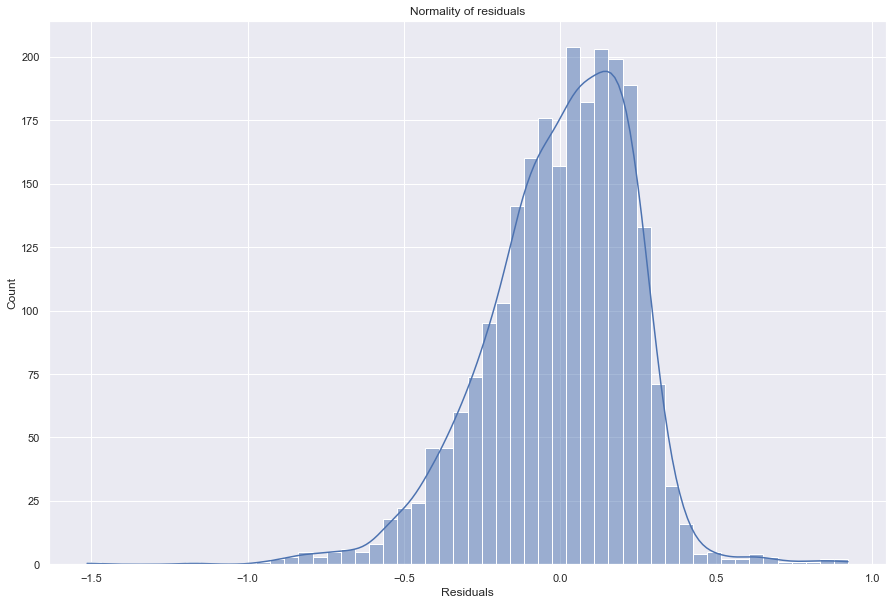

<IPython.core.display.Javascript object>

In [56]:
#checking the distribution of residuals
plt.figure(figsize=(15, 10))
plt.title("Normality of residuals")
sns.histplot(data=df_pred, x="Residuals", kde=True);  


#### Observations:
The distribution of residuals is an approximation of normal distribution.

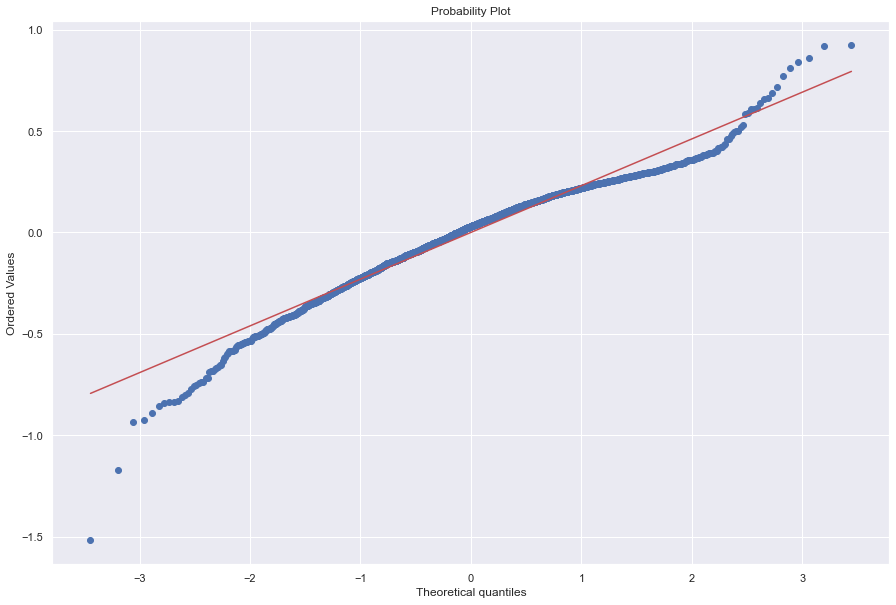

<IPython.core.display.Javascript object>

In [57]:
import pylab
import scipy.stats as stats

#checking the Q-Q plot of residuals
plt.figure(figsize=(15, 10))
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab);


#### Observations:
The residuals more or less follow a straight line except for the tails.

In [58]:
# apply the Shapiro-Wilks test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995328206686811e-23)

<IPython.core.display.Javascript object>

#### Observations:
According to the Shapiro-Wilks test, the p-value is less than 0.05, indicating the residuals are not normal. However, as an approximation, we can accept this distribution as close to being normal.

**So, the assumption is satisfied.**

### Test for Homoscedasticity

In [59]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# perform goldfeldquandt test
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0087504199106763), ('p-value', 0.4401970650667071)]

<IPython.core.display.Javascript object>

#### Observations:
Since p-value > 0.05, we can say that the residuals are homoscedastic.

**So, this assumption is satisfied.**

## Final Model
Let's rebuild the final model and print it's summary to gain insights.

In [60]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                           18:15:17   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [61]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


<IPython.core.display.Javascript object>

In [62]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


<IPython.core.display.Javascript object>

In [63]:
# Let us write the equation of linear regression
Equation = "normalize_used_price ="
print(Equation, end=" ")
for i in range(len(x_train_final.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end=" ")
    elif i != len(x_train_final.columns) - 1:
        print(
            olsmodel_final.params[i],
            "* (",
            x_train_final.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmodel_final.params[i], "* (", x_train_final.columns[i], ")")

normalize_used_price = 1.4999812451972634 + 0.02096722879075294 * ( main_camera_mp ) +  0.013827288876828433 * ( selfie_camera_mp ) +  0.020712701657147378 * ( ram ) +  0.0016616476692228256 * ( weight ) +  0.44147230022363776 * ( normalized_new_price ) +  -0.029169763671539513 * ( years_since_release ) +  0.1155984450647658 * ( brand_name_Karbonn ) +  -0.03742329934072833 * ( brand_name_Samsung ) +  -0.0669928513011171 * ( brand_name_Sony ) +  0.08006840695804224 * ( brand_name_Xiaomi ) +  -0.12757512561897935 * ( os_Others ) +  -0.09000552317648895 * ( os_iOS ) +  0.050213451529783085 * ( 4g_yes ) +  -0.06725868426972254 * ( 5g_yes )


<IPython.core.display.Javascript object>

## Actionable Insights and Recommendations 

- The model explains 83% of the variation in the dataset. The high R-square indicates the model is fit for forecasting.
- If the ram increases by one unit, then its used price increases by 0.0207 units, all other variables held constant.
- If the main camera pixel increases by one unit, then its used price increases by 0.0210 units, all other variables held constant.
- If the selfie camera pixel increases by one unit, its used price increases by 0.0138 units and all other variables are held constant.
- If weight increases by one unit, then its used price increases by 0.0138 units, and all other variables held constant.
- Phones that have a higher new price have a higher used price.
- The number of released years could determine the used price value. The older the phone, the less the used price value.


___